In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# EXPLORACION INICIAL PASO 
df.head()

,Order_Date,Product_Name,Category,Region,Quantity,Sales,Profit,Year,Month,Month_Number
0,2024-12-31,Printer,Office,North,4,3640,34893.0,2024,2024-12,12
1,2022-11-27,Mouse,Accessories,East,7,1197,10653.0,2022,2022-11,11
2,2022-05-11,Tablet,Electronics,South,5,5865,50273.0,2022,2022-05,5
3,2024-03-16,Mouse,Accessories,South,2,786,20287.0,2024,2024-03,3
4,2022-09-10,Mouse,Accessories,West,1,509,10328.0,2022,2022-09,9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_Date    3500 non-null   datetime64[ns]
 1   Product_Name  3500 non-null   object        
 2   Category      3500 non-null   object        
 3   Region        3500 non-null   object        
 4   Quantity      3500 non-null   int64         
 5   Sales         3500 non-null   int64         
 6   Profit        3500 non-null   float64       
 7   Year          3500 non-null   int32         
 8   Month         3500 non-null   period[M]     
 9   Month_Number  3500 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(3), period[M](1)
memory usage: 246.2+ KB


In [ ]:
df.isna().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

In [ ]:
df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [4]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


In [5]:
# ===========================================================
# 1️⃣ CONEXIÓN A SQL SERVER
# ===========================================================

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-QDT86VK;"
    "DATABASE=EcommerceDB;"
    "Trusted_Connection=yes;"
)

query = "SELECT * FROM ecommerce"
df = pd.read_sql(query, conn)

C:\Users\Bryan b\AppData\Local\Temp\ipykernel_6540\4290992302.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [8]:
# ===========================================================
# 2️⃣ LIMPIEZA Y TRANSFORMACIÓN
# ===========================================================

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.to_period('M')

In [9]:
# ===========================================================
# 3️⃣ KPIs GENERALES
# ===========================================================

total_sales = df['Sales'].sum()
average_ticket = df['Sales'].mean()

print("Ventas Totales:", total_sales)
print("Ticket Promedio:", round(average_ticket, 2))

Ventas Totales: 10667881
Ticket Promedio: 3047.97


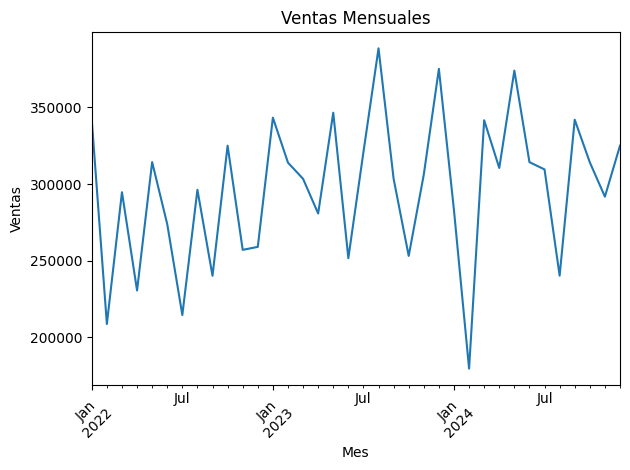

In [10]:
# ===========================================================
# 4️⃣ VENTAS POR MES
# ===========================================================

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Ventas Mensuales")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

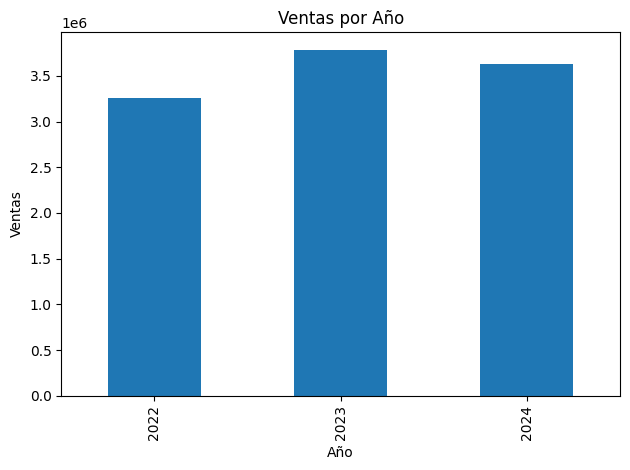

In [11]:
# ===========================================================
# 5️⃣ VENTAS POR AÑO
# ===========================================================

yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure()
yearly_sales.plot(kind='bar')
plt.title("Ventas por Año")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.tight_layout()
plt.show()

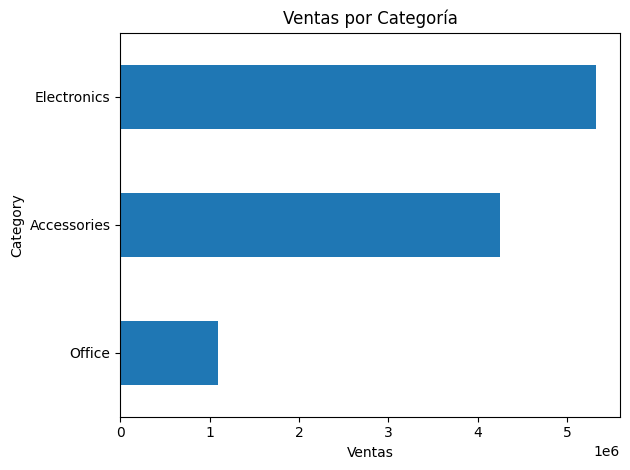

In [12]:
# ===========================================================
# 6️⃣ VENTAS POR CATEGORÍA
# ===========================================================

category_sales = df.groupby('Category')['Sales'].sum().sort_values()

plt.figure()
category_sales.plot(kind='barh')
plt.title("Ventas por Categoría")
plt.xlabel("Ventas")
plt.tight_layout()
plt.show()

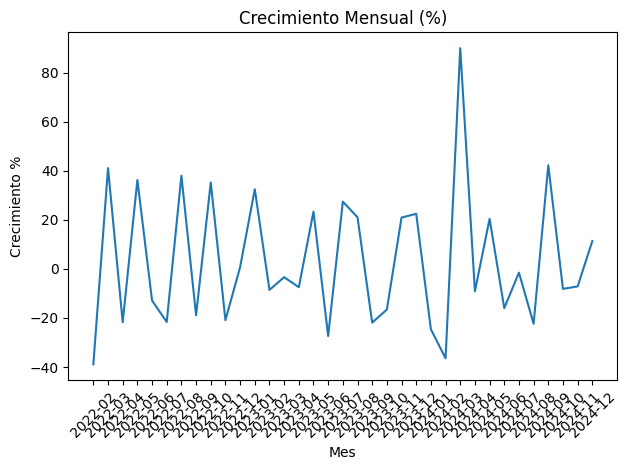


Promedio de crecimiento mensual: 3.38 %

Mayor crecimiento mensual: 90.07 %
Mayor caída mensual: -38.87 %


In [13]:
# ===========================================================
# 7️⃣ CRECIMIENTO MENSUAL (%)
# ===========================================================

monthly_df = df.groupby('Month')['Sales'].sum().reset_index()
monthly_df['Growth_%'] = monthly_df['Sales'].pct_change() * 100

# Eliminamos el primer NaN
monthly_df = monthly_df.dropna()

plt.figure()
plt.plot(monthly_df['Month'].astype(str), monthly_df['Growth_%'])
plt.title("Crecimiento Mensual (%)")
plt.xlabel("Mes")
plt.ylabel("Crecimiento %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nPromedio de crecimiento mensual:",
      round(monthly_df['Growth_%'].mean(), 2), "%")

print("\nMayor crecimiento mensual:",
      round(monthly_df['Growth_%'].max(), 2), "%")

print("Mayor caída mensual:",
      round(monthly_df['Growth_%'].min(), 2), "%")

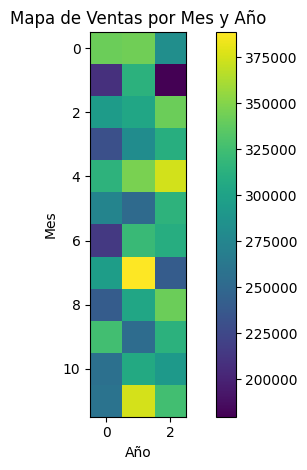


Tabla Año-Mes:

Year            2022    2023    2024
Month_Number                        
1             341544  343256  282814
2             208775  313931  179708
3             294660  303391  341563
4             230624  280808  310444
5             314295  346481  373911
6             273851  251686  314268
7             214627  320798  309515
8             296242  388428  240269
9             240211  303409  341926
10            324989  253145  314135
11            257111  306195  291769
12            259041  375064  324997


In [14]:
# ===========================================================
# 8️⃣ MATRIZ AÑO-MES (ESTACIONALIDAD)
# ===========================================================

df['Month_Number'] = df['Order_Date'].dt.month

pivot_table = df.pivot_table(
    values='Sales',
    index='Month_Number',
    columns='Year',
    aggfunc='sum'
)

plt.figure()
plt.imshow(pivot_table)
plt.title("Mapa de Ventas por Mes y Año")
plt.xlabel("Año")
plt.ylabel("Mes")
plt.colorbar()
plt.tight_layout()
plt.show()

print("\nTabla Año-Mes:\n")
print(pivot_table)